In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models, layers, backend

dftrain_raw = pd.read_csv('./data/titanic/train.csv')
dftest_raw = pd.read_csv('./data/titanic/test.csv')
dftrain_raw.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


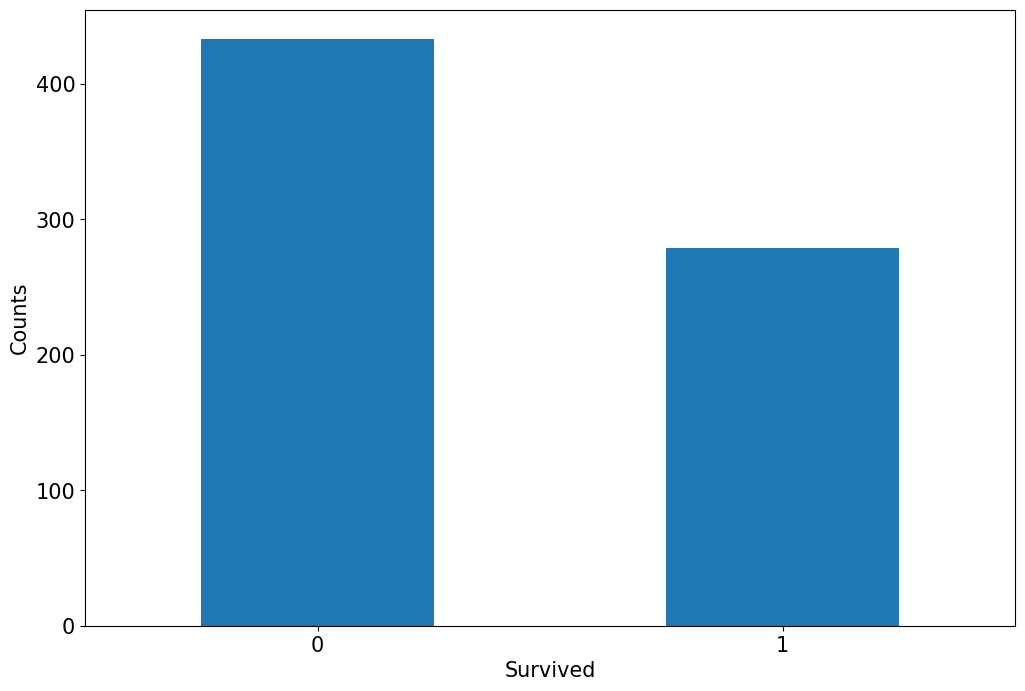

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind= 'bar', figsize= (12, 8), fontsize= 15, rot= 0)
ax.set_ylabel('Counts', fontsize = 15)
ax.set_xlabel('Survived', fontsize = 15)
plt.show()

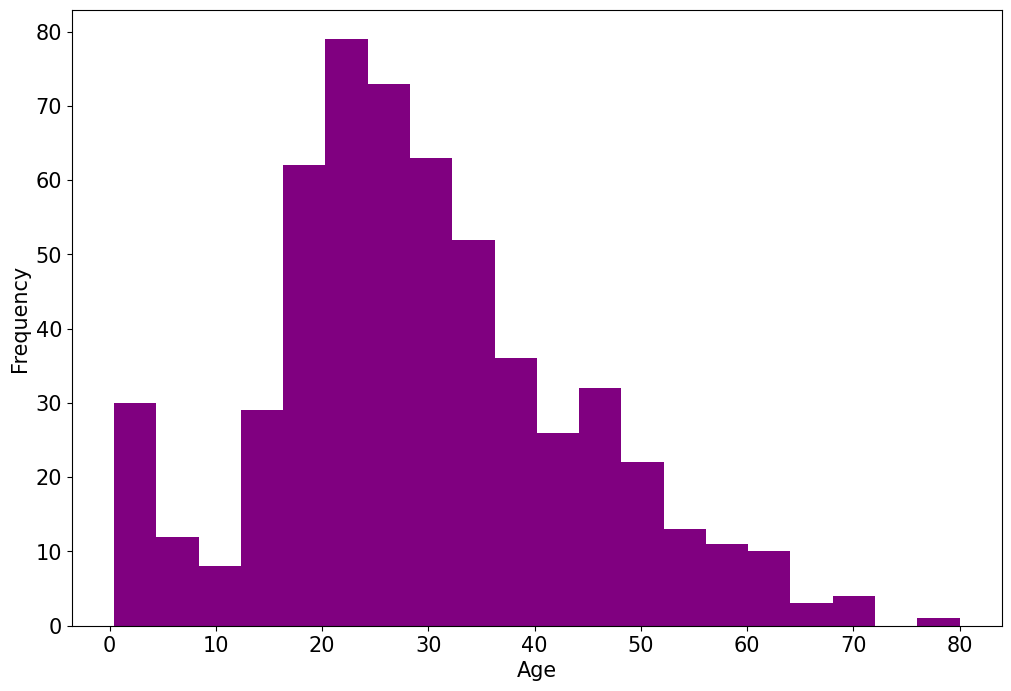

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind= 'hist', bins = 20, color = 'purple', figsize= (12, 8), fontsize= 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.show()



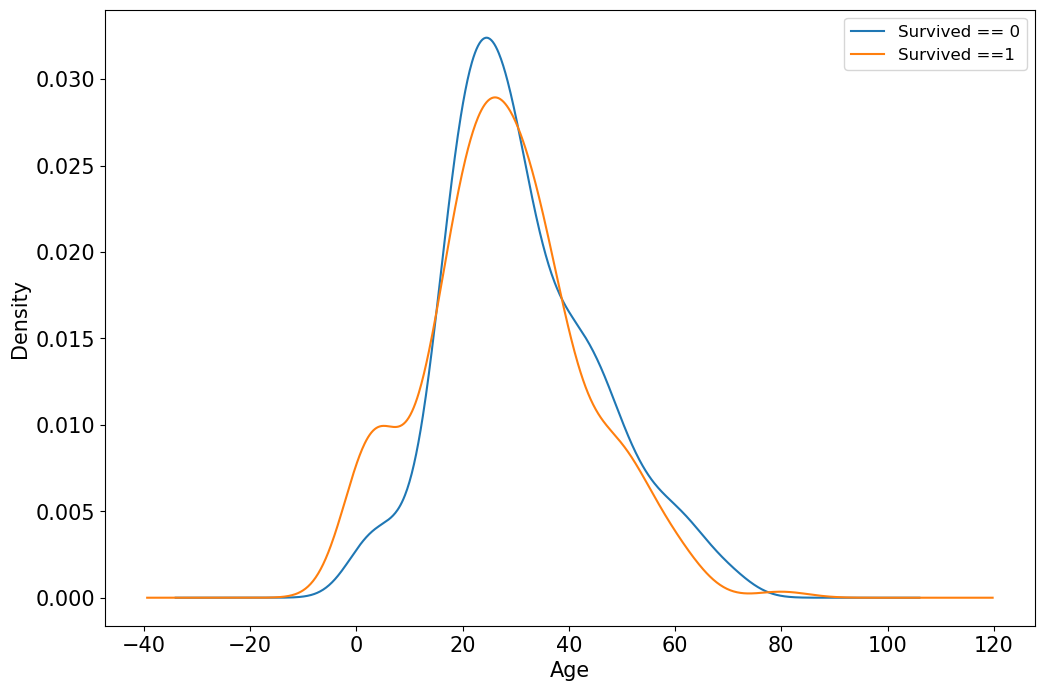

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind= 'density', figsize= (12,8), fontsize= 15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind= 'density', figsize= (12,8), fontsize= 15)
ax.legend(['Survived == 0', 'Survived ==1'], fontsize=12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.show()






In [5]:
def preprocessing(dfdata):
    dfresult = pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]
    dfresult = pd.concat([dfresult, dfPclass], axis= 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

print('x_train.shape = ', x_train.shape)
print('x_test.shape = ', x_test.shape)



x_train.shape =  (712, 15)
x_test.shape =  (179, 15)


In [6]:
backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation= 'relu', input_shape = (15,)))
model.add(layers.Dense(10, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.summary()

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['AUC'])

history = model.fit(x_train, y_train, batch_size= 64, epochs= 30, validation_split= 0.2)



: 

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()



In [ ]:
plot_metric(history, 'loss')


In [ ]:
plot_metric(history, 'AUC')


In [ ]:
model.evaluate(x= x_test, y = y_test)
